In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
wavelength = 0.02    # Angstrom at 300 kV
C_s = 2.7 * 1e7 # third-order spherical aberration constant, mm * 1e7 (Angstrom)

def CTF(k_x, k_y, dz_1, dz_2, angle_astig, C_s, wavelength, B):

  average_defocus = (dz_1 + dz_2)/2
  astigmatism = (dz_2 - dz_1)/2
  angle_k = np.arctan(k_y/k_x)

  dz = average_defocus + astigmatism * np.cos(2*(angle_k - angle_astig))

  defocus_term = - np.pi * dz * wavelength * (k_x**2 + k_y**2)

  sph_aberration_term = np.pi/2 * C_s * wavelength**2 * (k_x**2 + k_y**2)**2

  envelope_function = np.exp(B * (k_x**2 + k_y**2))

  return  np.sin( defocus_term + sph_aberration_term ) * envelope_function

#def dz(dz_1, dz_2, angle_k, angle_astig,):
#  average_defocus = (dz_1 + dz_2)/2
#  astigmatism = (dz_1 - dz_2)/2
#  return average_defocus + astigmatism * np.cos(2*(angle_k - angle_astig))


dz_1 = 20 * 1e4
dz_2 = 6 * 1e4
B=-60
angle_astig =  0 * 2*np.pi/360

k_x = np.arange(-0.2, 0.2, 2.5e-4)
k_y = np.arange(-0.2, 0.2, 2.5e-4)
size_x = len(k_x)
size_y = len(k_y)
ctf = np.array([CTF(kx, ky, dz_1, dz_2, angle_astig, C_s, wavelength, B) for kx in k_x for ky in k_y]).reshape(size_x, size_y)

Text(0, 0.5, 'CTF$^2$')

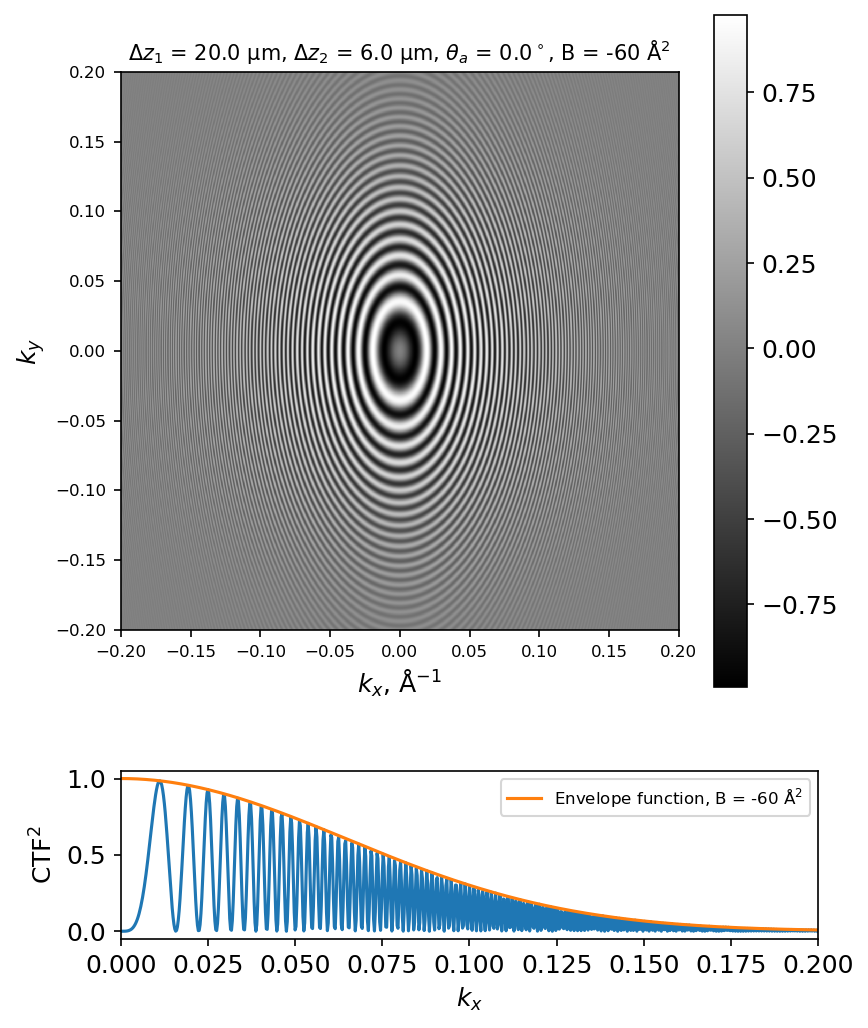

In [76]:
fig, ax = plt.subplots(2, 1,
                       figsize=(6,8), 
                       gridspec_kw={
                           'height_ratios': [4, 1],
                       },
                       dpi=150)
fig.subplots_adjust()#hspace=0.5)

im = ax[0].pcolormesh(
    k_x, k_y,
    ctf,
    cmap='gray',
    )
ax[0].set_title(rf'$\Delta z_1$ = {dz_1*1e-4} $\mathrm{{\mu}}$m, $\Delta z_2$ = {dz_2*1e-4} $\mathrm{{\mu}}$m, $\theta_a$ = {angle_astig*360/(2*np.pi)}$^\circ$, B = {B} $\mathrm{{\AA}}^2$', fontsize=10)
ax[0].set_xlabel(r'$k_x$, $\mathrm{{\AA}}^{{-1}}$')
ax[0].set_ylabel(r'$k_y$')
ax[0].set_aspect('equal')
cbar = fig.colorbar(im, ax=ax[0])

# label x and y tick marks every 0.05, change their font size. Make sure the ticks are within the range of the plot.
ax[0].set_xticks(np.arange(-0.20, 0.25, 0.05))
ax[0].set_yticks(np.arange(-0.20, 0.25, 0.05))
ax[0].tick_params(axis='both', which='major', labelsize=8)


ax[1].plot(
    k_x,
    ctf[int(size_x/2), :]**2,
)
ax[1].plot(
    k_x,
    np.exp(B * k_x**2)**2,
    label=rf'Envelope function, B = {B} $\mathrm{{\AA}}^2$'
)
ax[1].legend(
    loc='upper right',
    fontsize=8
)
ax[1].set_xlim(0, 0.2)
ax[1].set_xlabel(r'$k_x$')
ax[1].set_ylabel(r'CTF$^2$')

In [6]:
def CTF(k_x, k_y, dz):

  defocus_term = - np.pi * dz * wavelength * (k_x**2 + k_y**2)
  sph_aberration_term = np.pi/2 * C_s * wavelength**2 * (k_x**2 + k_y**2)**2

  return  np.sin( defocus_term + sph_aberration_term )

dz = 3 * 1e4
k_x = np.arange(-0.1, 0.1, 5e-4)
k_y = np.arange(-0.1, 0.1, 5e-4)
size_x = len(k_x)
size_y = len(k_y)
ctf = np.array([CTF(kx, ky, dz) for kx in k_x for ky in k_y]).reshape(size_x, size_y)

Text(0.5, 0, '$k_x$')

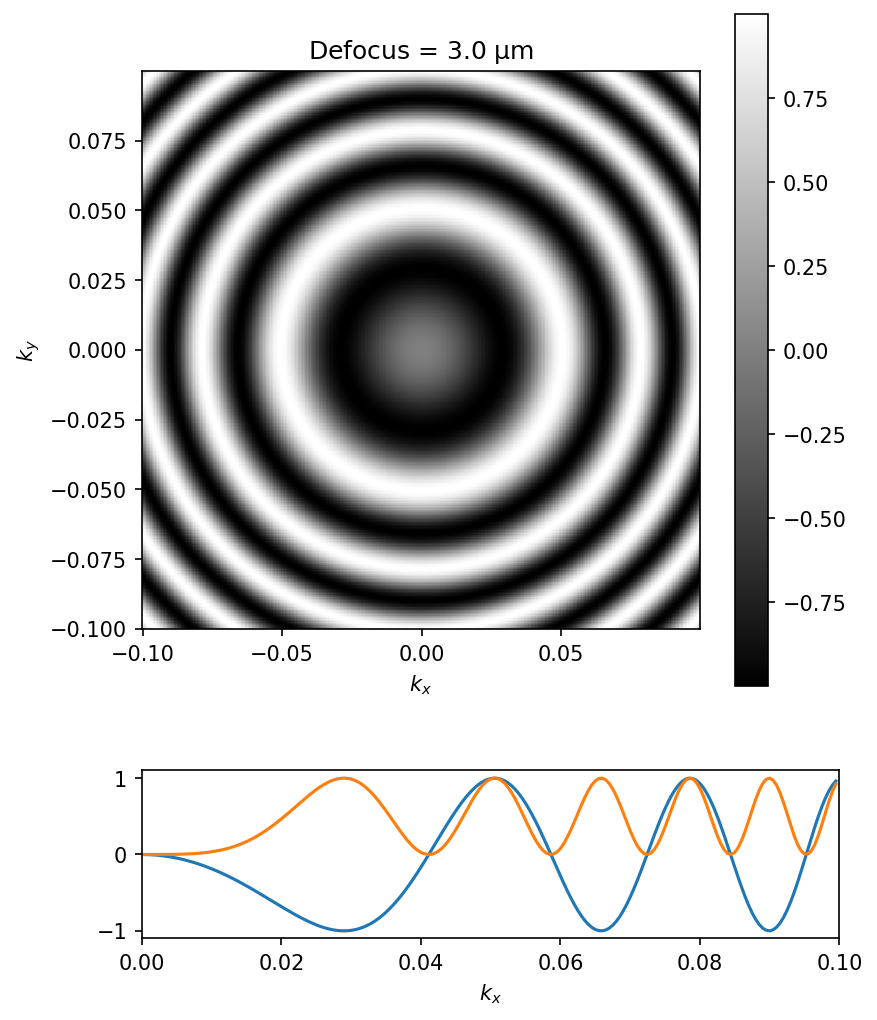

In [7]:
fig, ax = plt.subplots(2, 1,
                       figsize=(6,8), 
                       gridspec_kw={
                           'height_ratios': [4, 1],
                       },
                       dpi=150)
fig.subplots_adjust()#hspace=0.5)

im = ax[0].pcolormesh(
    k_x, k_y,
    ctf,
    cmap='gray',
    )
ax[0].set_title(rf'Defocus = {dz*1e-4} $\mathrm{{\mu}}$m')
ax[0].set_xlabel(r'$k_x$')
ax[0].set_ylabel(r'$k_y$')
ax[0].set_aspect('equal')
cbar = fig.colorbar(im, ax=ax[0])


ax[1].plot(
    k_x,
    ctf[int(size_x/2), :],
)
ax[1].plot(
    k_x,
    ctf[int(size_x/2), :]**2,
)
ax[1].set_xlim(0, 0.1)
ax[1].set_xlabel(r'$k_x$')